In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#EDA

In [ ]:
df2 = pd.read_csv('/content/cleaned_ClimateData.csv')

In [ ]:
df2

,Unnamed: 0,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,102320,1796-01-01,14.855,2.339,Agra,India,26.52N,78.81E
1,102321,1796-02-01,17.813,1.842,Agra,India,26.52N,78.81E
2,102322,1796-03-01,22.309,2.531,Agra,India,26.52N,78.81E
3,102323,1796-04-01,29.559,2.019,Agra,India,26.52N,78.81E
4,102324,1796-05-01,34.471,1.842,Agra,India,26.52N,78.81E
...,...,...,...,...,...,...,...,...
7006,263936,2013-04-01,26.997,0.524,Amritsar,India,31.35N,75.39E
7007,263937,2013-05-01,32.963,0.458,Amritsar,India,31.35N,75.39E
7008,263938,2013-06-01,33.226,0.466,Amritsar,India,31.35N,75.39E
7009,263939,2013-07-01,31.599,0.571,Amritsar,India,31.35N,75.39E


In [ ]:
df2=df2[['dt','AverageTemperature']]
df2.head()

,dt,AverageTemperature
0,1796-01-01,14.855
1,1796-02-01,17.813
2,1796-03-01,22.309
3,1796-04-01,29.559
4,1796-05-01,34.471


In [ ]:
df2.columns=['Date','Temp']
df2.head()

,Date,Temp
0,1796-01-01,14.855
1,1796-02-01,17.813
2,1796-03-01,22.309
3,1796-04-01,29.559
4,1796-05-01,34.471


In [ ]:
from datetime import datetime

In [ ]:
df2.loc[:, 'Date'] = pd.to_datetime(df2['Date'])

In [ ]:
df2.isnull().sum()

Date    0
Temp    0
dtype: int64

In [ ]:
df2.shape

(7011, 2)

In [ ]:
df2.set_index('Date',inplace=True)

##check stationarity

const mean


---


const std dev


---


autocovariance= independent of time












In [ ]:
import seaborn as sns

<Axes: xlabel='Date', ylabel='Temp'>

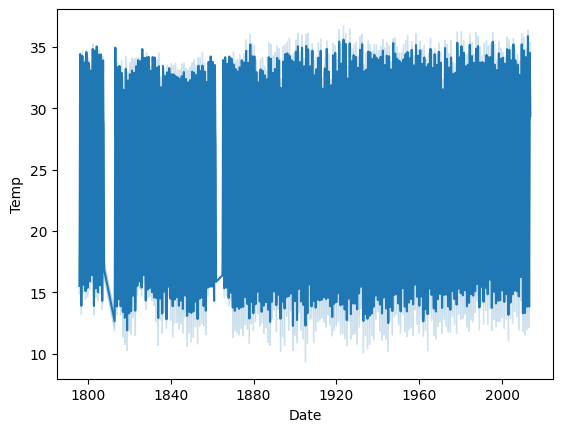

In [ ]:
sns.lineplot(x=df2.index,y=df2['Temp'])

In [ ]:
pip install statsmodels

dickey fuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df2['Temp'])

In [ ]:
def adfuller_test(temp):
    result=adfuller(temp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df2['Temp'])

ADF Test Statistic : -4.1318571535981885
p-value : 0.0008575298145494112
#Lags Used : 35
Number of Observations Used : 6975
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


data is non - stationary, now check for seasonality

In [ ]:
df2['month']=df2.index.month
df2['year']=df2.index.year

In [ ]:
df2.head()

,Temp,month,year
Date,,,
1796-01-01,14.855,1,1796
1796-02-01,17.813,2,1796
1796-03-01,22.309,3,1796
1796-04-01,29.559,4,1796
1796-05-01,34.471,5,1796


In [ ]:
df2.columns

Index(['Temp', 'month', 'year'], dtype='object')

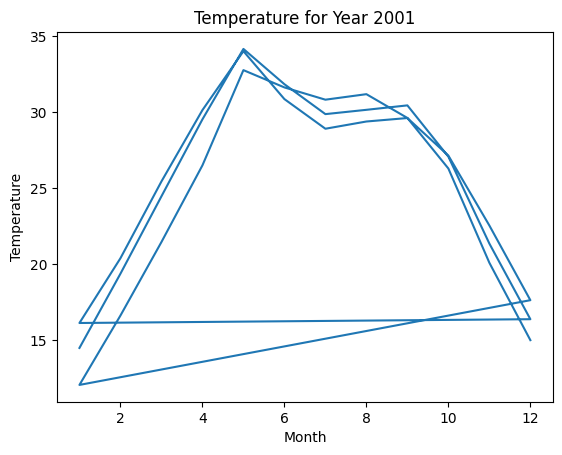

In [ ]:
year_to_plot = 2001
year_data = df2[df2['year'] == year_to_plot]

plt.plot(year_data['month'], year_data['Temp'].head(3000))
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title(f'Temperature for Year {year_to_plot}')
plt.show()

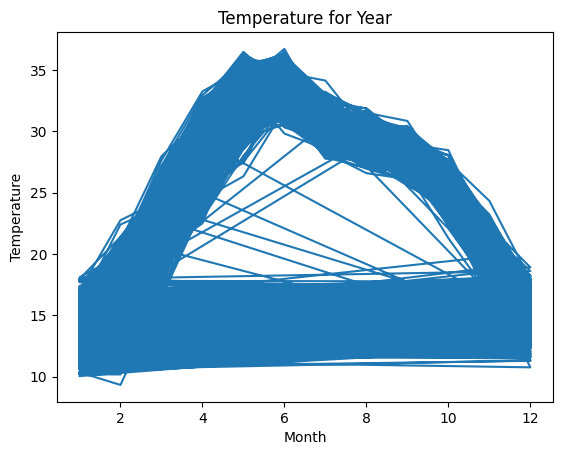

In [ ]:
plt.plot(df2['month'], df2['Temp'])
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title(f'Temperature for Year')
plt.show()

the data is seasonal

#moving average

In [ ]:
movavg = df2['Temp'].rolling(window=2).mean()

In [ ]:
value=pd.DataFrame(df2['Temp'])

In [ ]:
temp_df=pd.concat([value,movavg],axis=1)

In [ ]:
temp_df.columns=['actual_temp','forecast_temp']
temp_df.head()

,actual_temp,forecast_temp
Date,,
1796-01-01,14.855,NaN
1796-02-01,17.813,16.334
1796-03-01,22.309,20.061
1796-04-01,29.559,25.934
1796-05-01,34.471,32.015


In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

rmse = np.sqrt(mean_squared_error(temp_df['forecast_temp'][1:], temp_df['actual_temp'][1:]))

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 1.9965238213511352


#SARIMA Model

In [ ]:
df2.sort_values(by='Date')

,Temp,month,year
Date,,,
1796-01-01,14.855,1,1796
1796-01-01,16.186,1,1796
1796-02-01,18.908,2,1796
1796-02-01,17.813,2,1796
1796-03-01,22.309,3,1796
...,...,...,...
2013-07-01,29.721,7,2013
2013-07-01,31.599,7,2013
2013-08-01,29.264,8,2013


In [ ]:
df2.tail()

,Temp,month,year
Date,,,
2013-04-01,26.997,4,2013
2013-05-01,32.963,5,2013
2013-06-01,33.226,6,2013
2013-07-01,31.599,7,2013
2013-08-01,30.040,8,2013


In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.9 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(df2['Temp'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

start_date = '2012-08-01'
end_date = '2013-08-01'

predicted_values = model_fit.predict(start=start_date, end=end_date)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


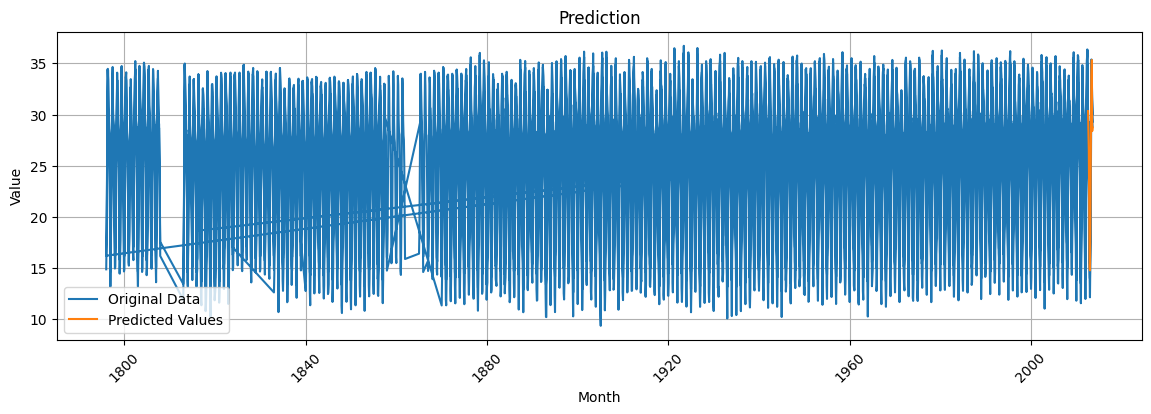

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(df2.index, df2['Temp'], label='Original Data')
plt.plot(predicted_values.index, predicted_values, label='Predicted Values')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Prediction')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
actual_values1 = df2['Temp']
predicted_values1 = model_fit.predict(start=start_date, end=end_date)

mae = np.mean(np.abs(actual_values1 - predicted_values1))
rmse = np.sqrt(np.mean((actual_values1 - predicted_values1) ** 2))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 1.3110795264910349
Root Mean Squared Error (RMSE): 1.6400574608515666


this model is not performing as good as the below model

##from year 2000

In [ ]:
df_last_150 = df2.iloc[-150:]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


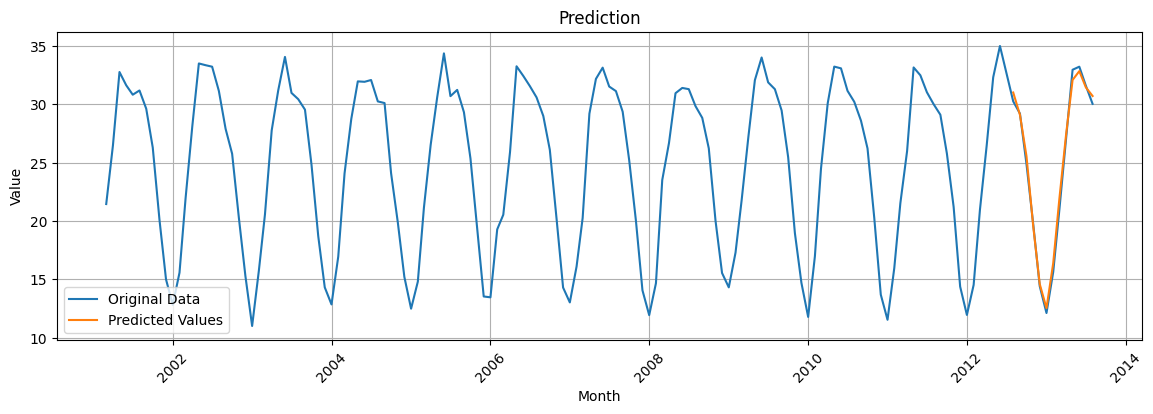

In [ ]:
model = SARIMAX(df_last_150['Temp'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

start_date = '2012-08-01'
end_date = '2013-08-01'

predicted_values = model_fit.predict(start=start_date, end=end_date)

plt.figure(figsize=(14,4))
plt.plot(df_last_150.index, df_last_150['Temp'], label='Original Data')
plt.plot(predicted_values.index, predicted_values, label='Predicted Values')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Prediction')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

actual_values = df_last_150['Temp']
predicted_values = model_fit.predict(start=start_date, end=end_date)

mae = np.mean(np.abs(actual_values - predicted_values))

# Calculate RMSE
rmse = np.sqrt(np.mean((actual_values - predicted_values) ** 2))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.4974693725503948
Root Mean Squared Error (RMSE): 0.5724012833787033


SARIMA for last 150 values is performing better

###Prediction: Results are altered because of global warming

#Final Auto ARIMA

In [ ]:
actual_values = df_last_150['Temp']

model_auto_arima = auto_arima(df_last_150['Temp'], seasonal=True, m=12)

order = model_auto_arima.order
seasonal_order = model_auto_arima.seasonal_order

print("Auto ARIMA Order (p, d, q):", order)
print("Auto ARIMA Seasonal Order (P, D, Q, m):", seasonal_order)

Auto ARIMA Order (p, d, q): (0, 0, 1)
Auto ARIMA Seasonal Order (P, D, Q, m): (2, 1, 0, 12)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model_arima = ARIMA(df_last_150['Temp'], order=(0, 0, 1), seasonal_order=(2, 1, 0, 12))
model_fit = model_arima.fit()

forecast = model_fit.predict(start='2012-08-01', end='2013-08-01')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
plt.figure(figsize=(14, 4))
plt.plot(df_last_150.index, df_last_150['Temp'], label='Original Data')
plt.plot(forecast.index, forecast, label='ARIMA Forecast', color='green')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('ARIMA Forecast')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
mae_arima = np.mean(np.abs(actual_values - forecast))
rmse_arima = np.sqrt(np.mean((actual_values - forecast) ** 2))

print("Mean Absolute Error (MAE) for ARIMA:", mae_arima)
print("Root Mean Squared Error (RMSE) for ARIMA:", rmse_arima)

## CONCLUSION  = ARIMA GIVES BETTER RESULTS THAN SARIMA

pickle file- ARIMA



In [ ]:
import pickle

with open('model_arima.pkl', 'wb') as file:
    pickle.dump(model_arima, file)

In [ ]:
with open('model_arima.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

pickle file- SARIMA

In [ ]:
with open('model_sarima.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
with open('model_sarima.pkl', 'rb') as file:
    loaded_model = pickle.load(file)